**Project Title**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df= pd.read_csv("/content/water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df['Potability']=df['Potability'].astype('category')

In [6]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [7]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [8]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [9]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [12]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [13]:
df.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

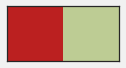

In [15]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#BB2020','#BDCC94']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

In [46]:
#Filling null values of Trihalomethanes column
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean() , inplace = True)
#round off the pH value to one decimal place
df['ph'] = df['ph'].round(decimals = 1)
df["ph"].head() 


0    7.1
1    3.7
2    8.1
3    8.3
4    9.1
Name: ph, dtype: float64

In [47]:
df["Type of Water"] = ""
for i in range(0,len(df)):
    if (df["ph"][i] > 9):
        df["Type of Water"][i] = "Alkaline water"
    elif (df["ph"][i] <= 9 and df["ph"][i] > 8):
        df["Type of Water"][i] = "Bottled waters labeled as alkaline"
    elif (df["ph"][i] <= 8 and df["ph"][i] > 7.5 ):
        df["Type of Water"][i] = "Ocean water"   
    elif(df["ph"][i] == 7.5 ):
        df["Type of Water"][i] = "Tap water"
    elif(df["ph"][i] < 7.5 and df["ph"][i] >=6.5):
        df["Type of Water"][i] = "Common bottled waters"
    elif(df["ph"][i] < 6.5 and df["ph"][i] >=5.5):
        df["Type of Water"][i] = "Distilled reverse osmosis water"
    else:
        df["Type of Water"][i] = "Acidic water"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying

In [48]:
df["Type of Hardness"] = ""
for i in range(0,len(df)):
    if (df["Hardness"][i] >=0  and df["Hardness"][i] < 17.1):
        df["Type of Hardness"][i] = "Soft"
    elif (df["Hardness"][i] >= 17.1 and df["Hardness"][i] < 60):
        df["Type of Hardness"][i] = "Slightly hard"
    elif (df["Hardness"][i] >= 60 and df["Hardness"][i] < 120 ):
        df["Type of Hardness"][i] = "Moderately hard"   
    elif(df["Hardness"][i] >= 120 and df["Hardness"][i] < 180):
        df["Type of Hardness"][i] = "Hard"
    else:
         df["Type of Hardness"][i] = "Very Hard"
import matplotlib.axes as Axes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying

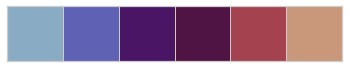

In [52]:
import seaborn as sb
colors = sb.color_palette('twilight')[0:6]
sb.palplot(colors)

Text(0.8, 1500, 'Safe for Human to drink')

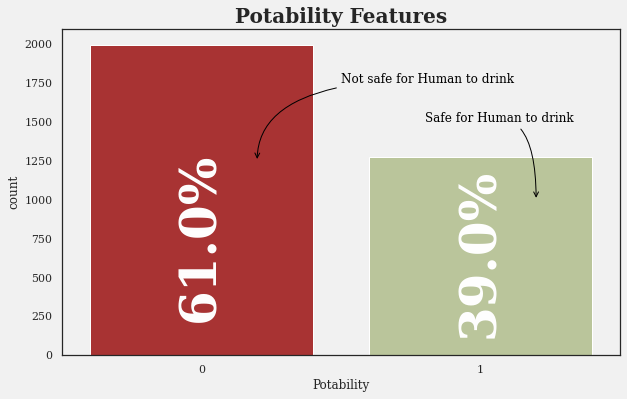

In [26]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Features", size=20, weight='bold')

ax.annotate("Not safe for Human to drink", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
ax.annotate("Safe for Human to drink", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')


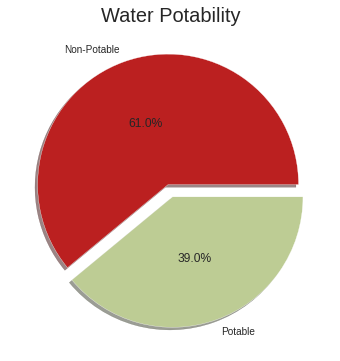

In [41]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = colors)
plt.title("Water Potability", fontsize=20);
plt.show()

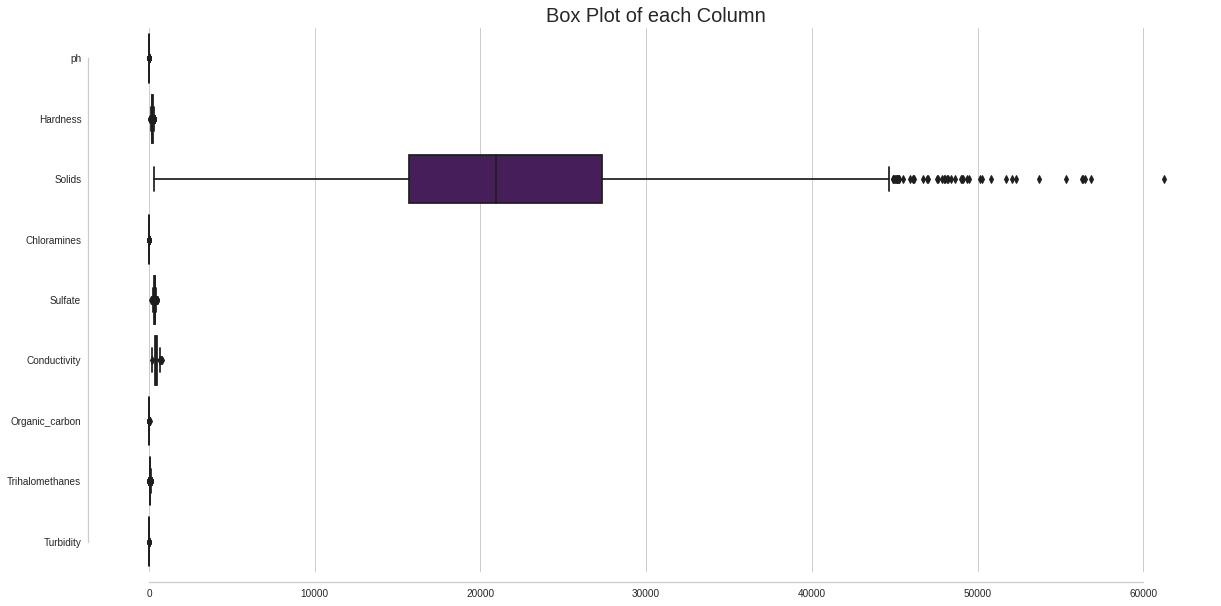

In [53]:
#Box Plot of each Column
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxplot(data=df, orient="h",palette = colors)
sb.despine(offset=10, trim=True)
plt.title("Box Plot of each Column", fontsize=20);
plt.show()

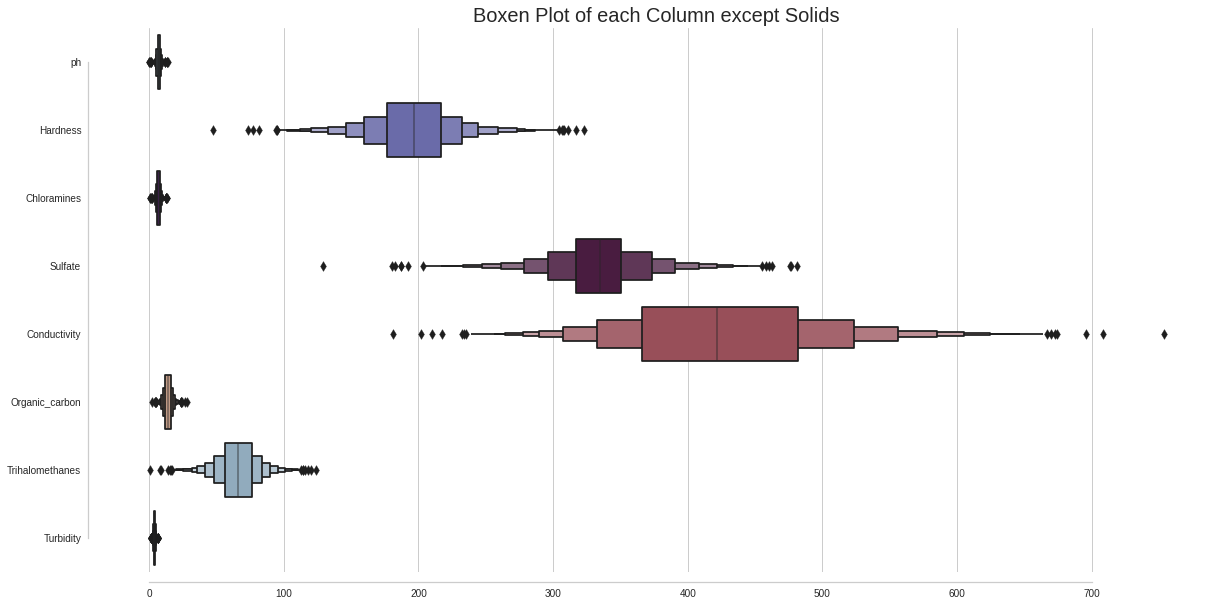

In [54]:
#Boxen Plot of each Column except Solids
df1 = pd.DataFrame()
df1 = df
df1 = df1.drop("Solids",1)
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxenplot(data=df1, orient="h", palette=colors)
sb.despine(offset=10, trim=True)
plt.title("Boxen Plot of each Column except Solids", fontsize=20);
plt.show()


In [27]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


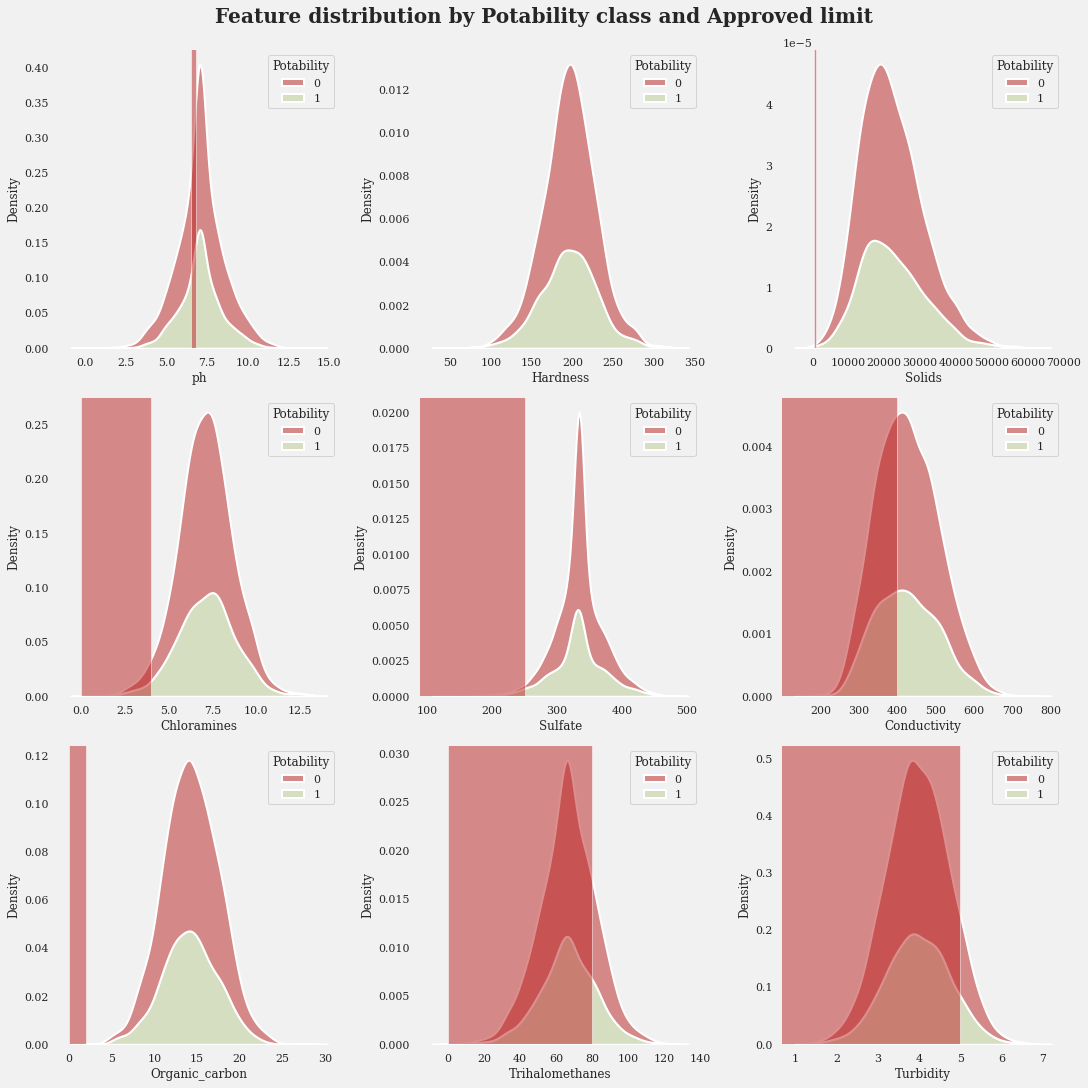

In [28]:
from matplotlib.patches import Rectangle
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

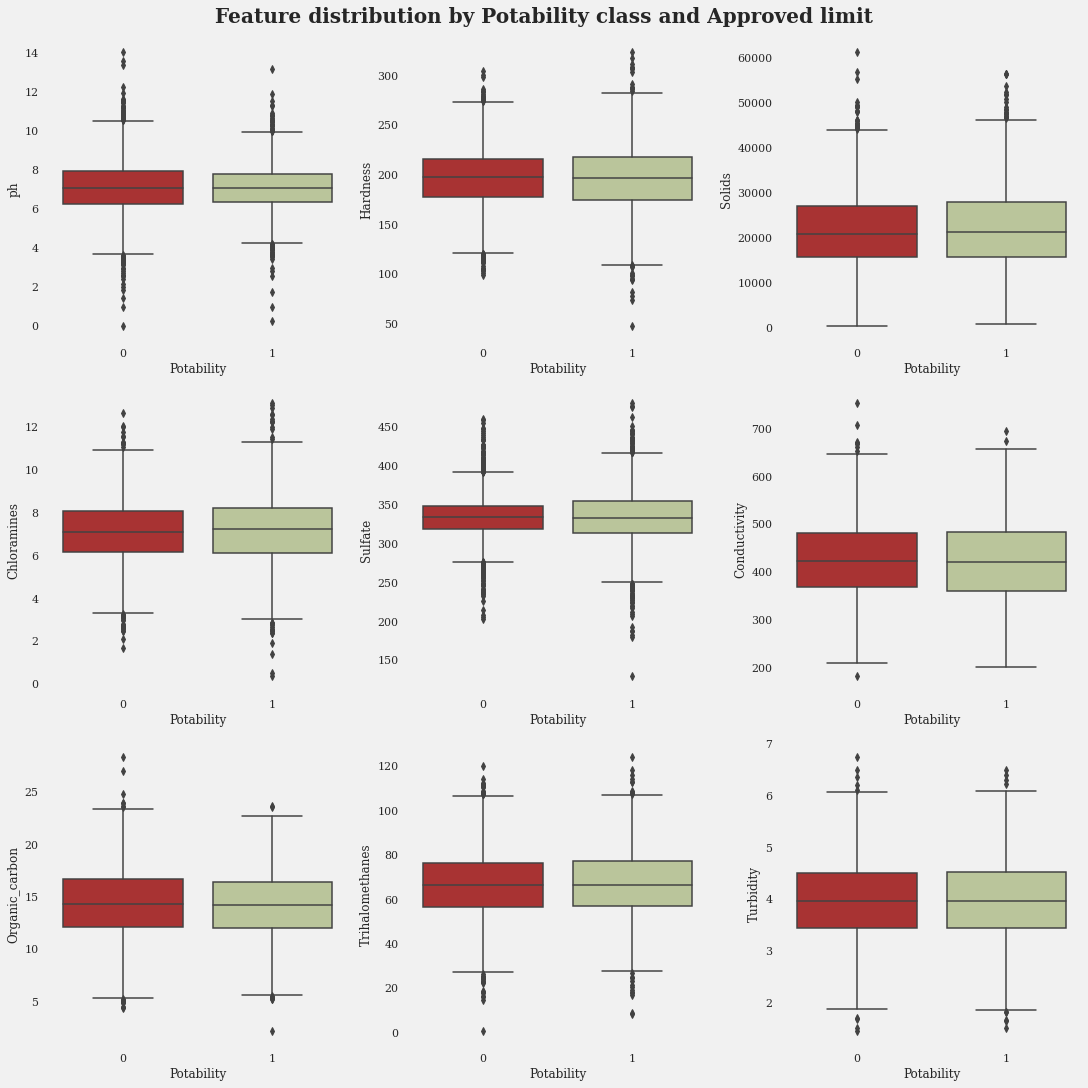

In [29]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



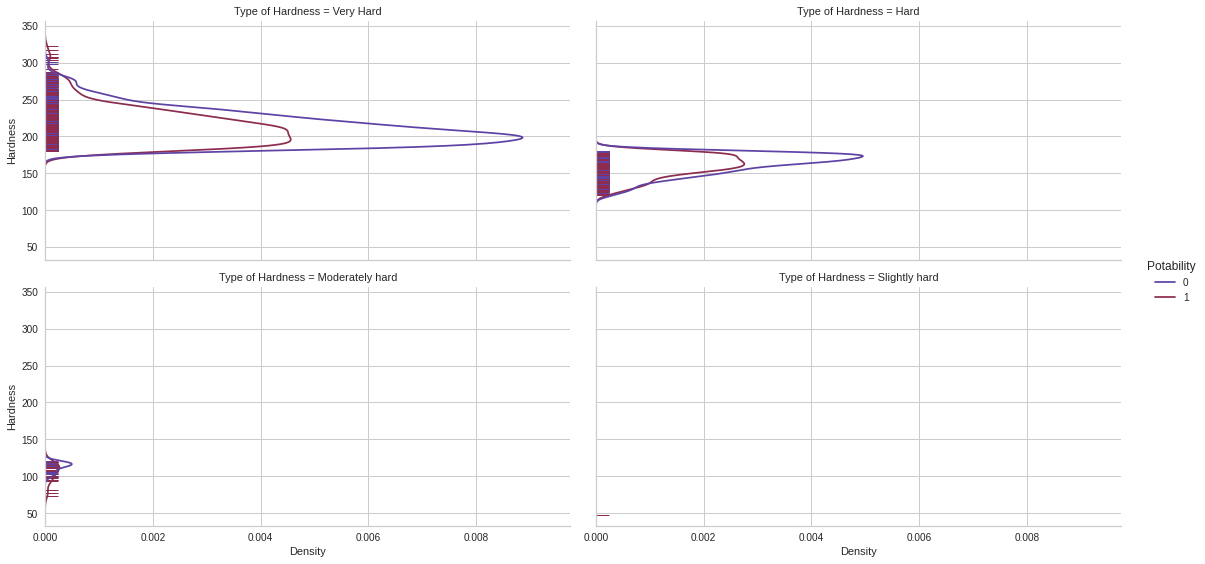

In [56]:
#Relation between Hardness and Potability
g = sb.displot(
    data=df, y="Hardness", hue="Potability", col="Type of Hardness", palette = "twilight",col_wrap=2,
    kind="kde", height=4, aspect=2,rug=True)

plt.show()

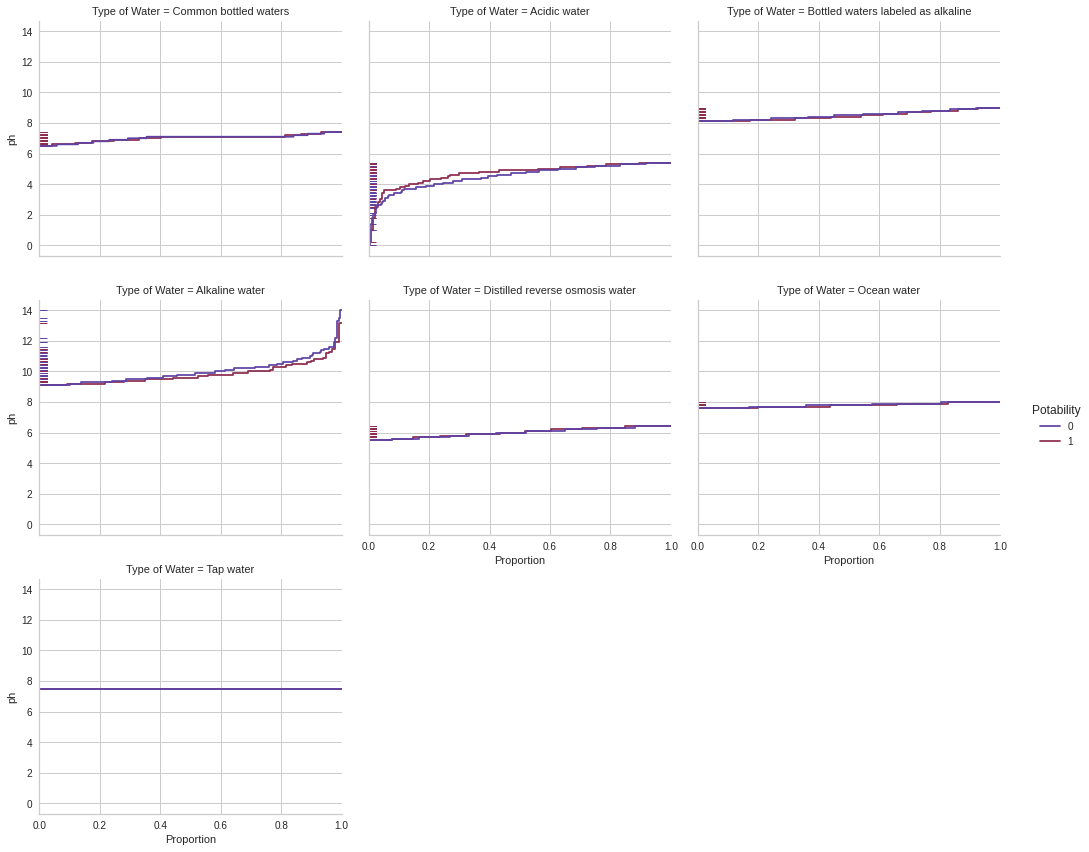

In [57]:
#Relation between ph and Potability
g = sb.displot(
    data=df, y="ph", hue="Potability", col="Type of Water", palette = "twilight", col_wrap=3,
    kind="ecdf", height=4, aspect=1.2,rug=True)

p_value for ph is 0.8257362194511897 we accept the null hypothesis
p_value for Hardness is 0.42854158740864634 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022465074671 we accept the null hypothesis
p_value for Sulfate is 0.12292453703922816 we accept the null hypothesis
p_value for Conductivity is 0.6418845485973679 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746163873828 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is 0.675988889793878 we accept the null hypothesis
p_value for Turbidity is 0.9279391620837931 we accept the null hypothesis


Text(6, 0.12, 'Significance level: 0.1')

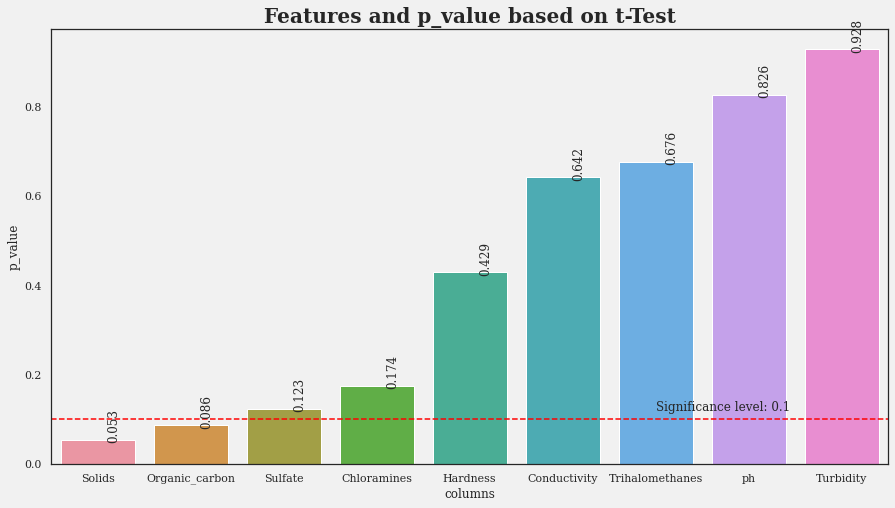

In [30]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=int_cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

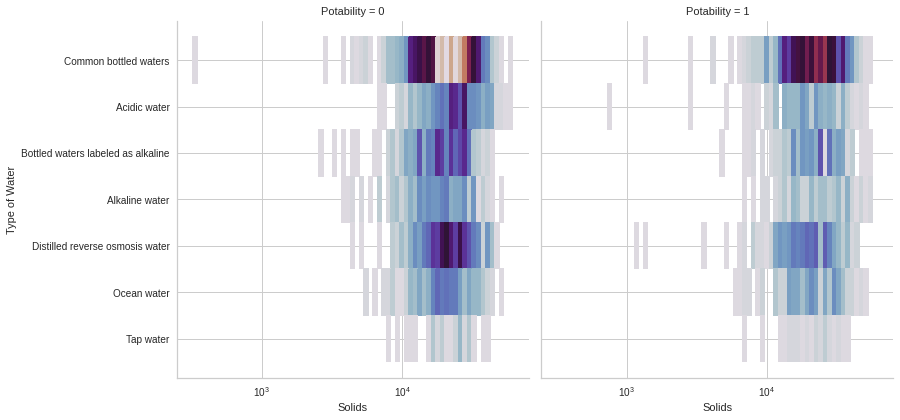

In [58]:
#Relation between Solids and Potability
sb.displot(data=df, x="Solids", y="Type of Water", col="Potability",cmap = "twilight",
    log_scale=(True, False), col_wrap=4, height=6, aspect=.95)

In [61]:
#One Hot Encoding of Categorical Columns
data = pd.get_dummies(df, columns = ['Type of Water', 'Type of Hardness'])
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type of Water_Acidic water,Type of Water_Alkaline water,Type of Water_Bottled waters labeled as alkaline,Type of Water_Common bottled waters,Type of Water_Distilled reverse osmosis water,Type of Water_Ocean water,Type of Water_Tap water,Type of Hardness_Hard,Type of Hardness_Moderately hard,Type of Hardness_Slightly hard,Type of Hardness_Very Hard
0,7.1,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0,0,0,1,0,0,0,0,0,0,1
1,3.7,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0,1,0,0,0,0,0,0,1,0,0,0
2,8.1,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0,0,0,1,0,0,0,0,0,0,0,1
3,8.3,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0,0,1,0,0,0,0,0,0,0,1
4,9.1,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,1,0,0,0,0,0,0,0,0,1


In [62]:
#Separate Target Column
X = data.drop(['Potability'], axis = 1)
Y = data['Potability']

In [63]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.75, random_state=83)

In [64]:
#Standardizing The Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

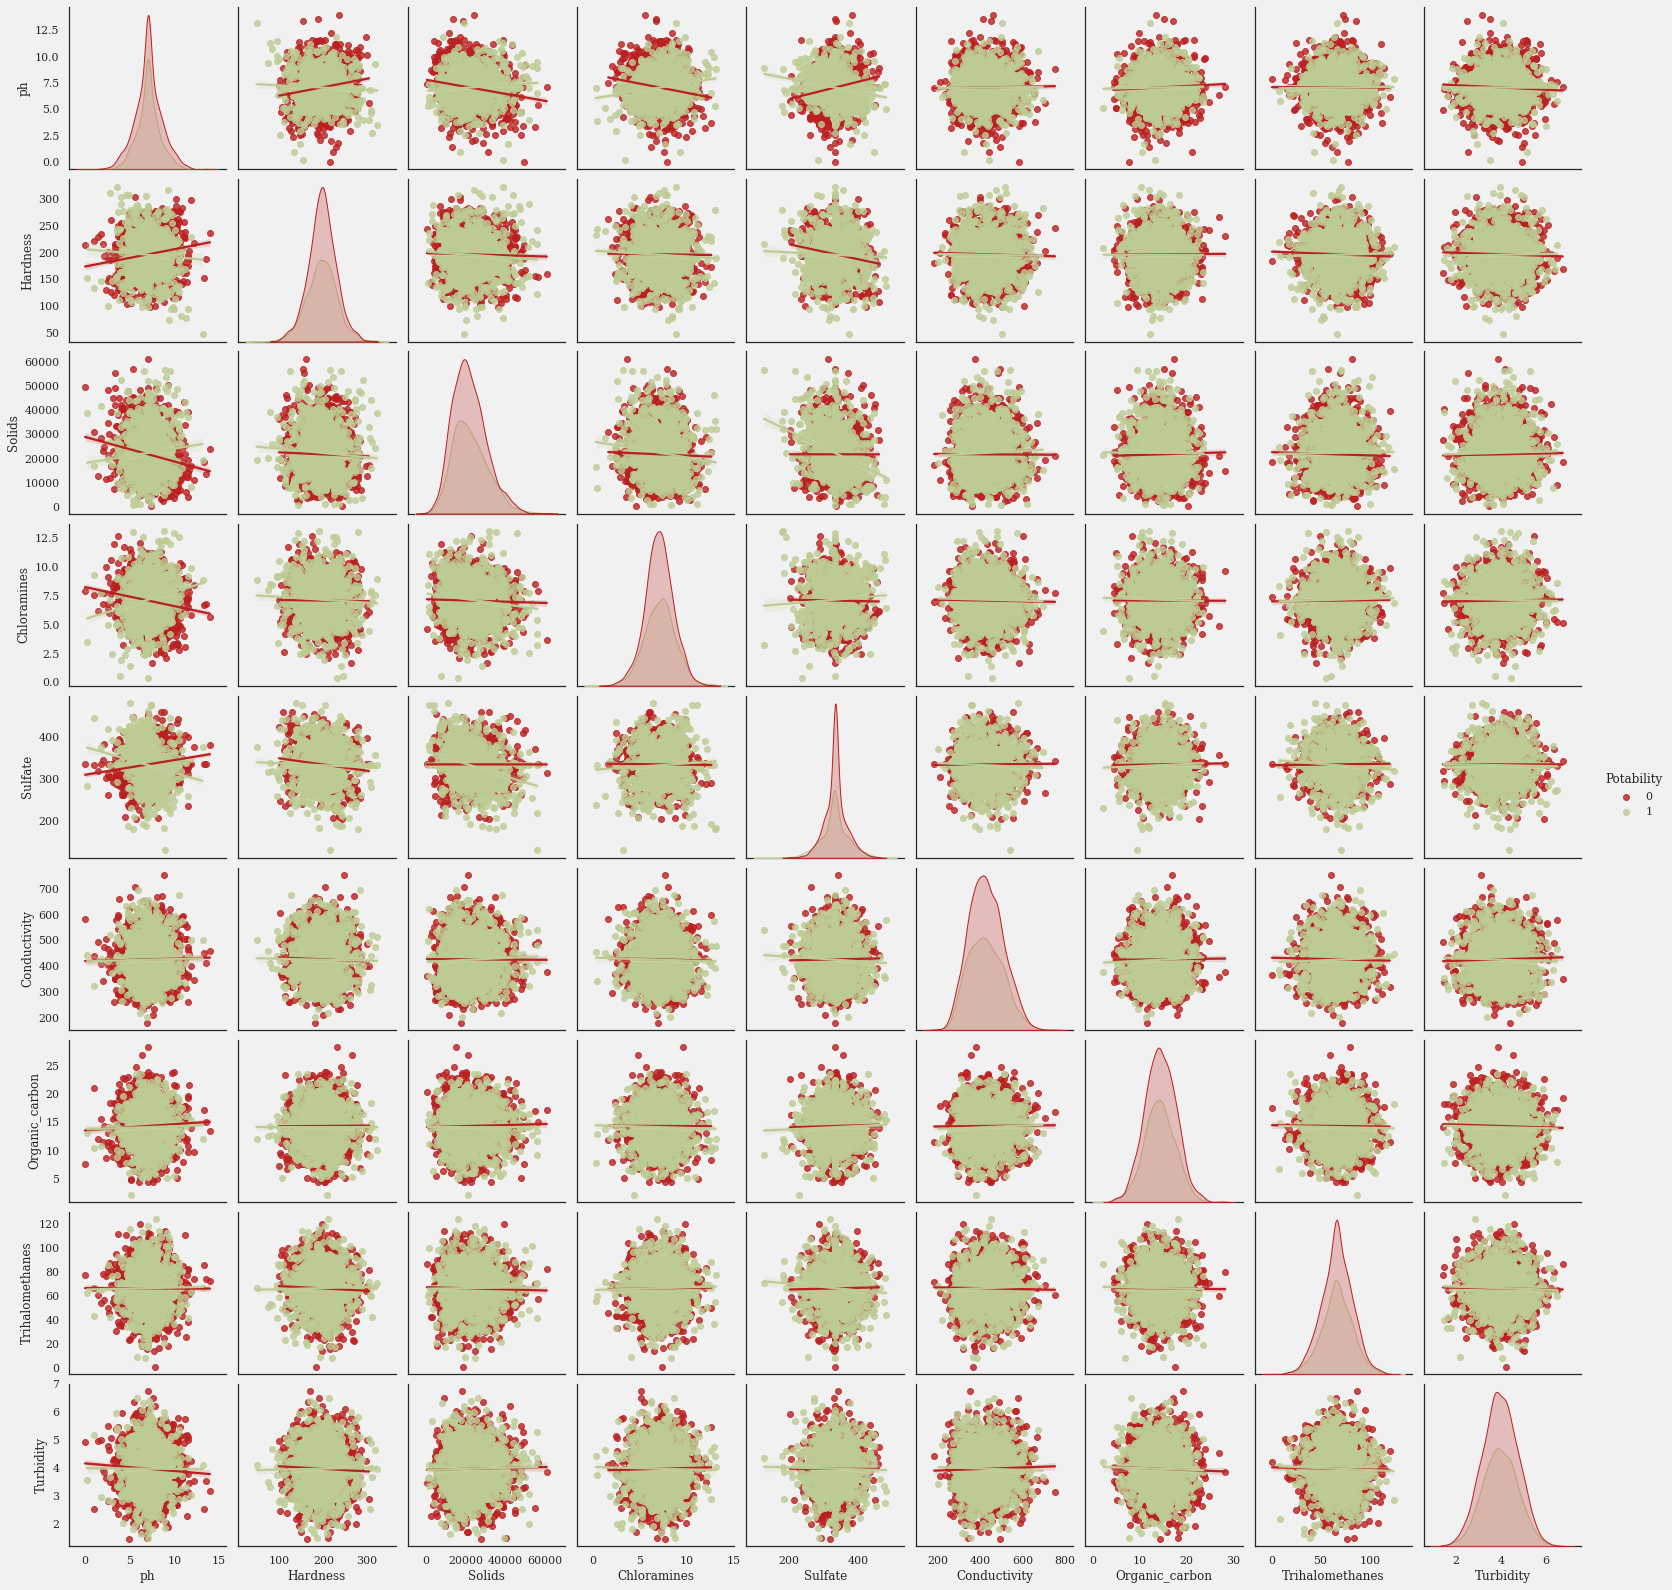

In [31]:
sns.pairplot(df, hue='Potability', kind='reg')

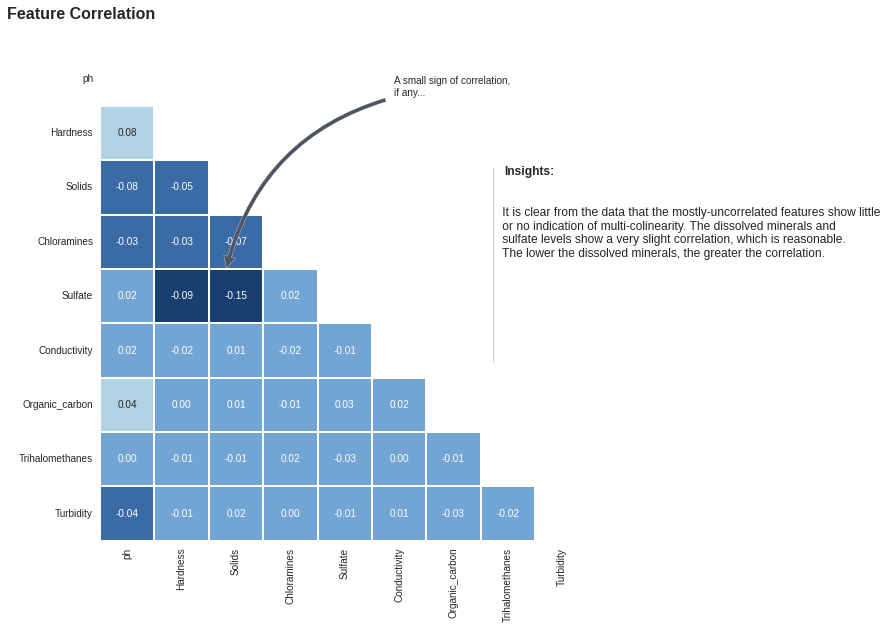

In [144]:
import matplotlib.lines as lines
blues = ['#193f6e','#3b6ba5','#72a5d3','#b1d3e3','#e1ebec']
darks = ['#4e5560','#866a67','#9a9385','#c5bfa7','#e6dbc8']
cmap_blues = sns.color_palette(blues)
cmap_darks = sns.color_palette(darks)
sns.set_palette(cmap_blues)
# create correlation map
corr_map = df.drop(columns='Potability').corr()

# create mask
mask = np.triu(np.ones_like(corr_map,dtype=bool))

# create correlation heatmap
fig = plt.figure(figsize=(15,9))

ax = sns.heatmap(
    data=corr_map, square=True, center=0, linewidth=1,
#     cmap=sns.diverging_palette(240, 10, s=60, l=40, n=9, center="light", as_cmap=True),
    cmap=cmap_blues,
    cbar=False,
    mask=mask,
    annot=True,
    fmt='.2f',
    cbar_kws={'shrink': 0.82}
)

ax.annotate(
    'A small sign of correlation,\nif any...',
    fontsize=10,fontweight='light',
    xy=(2.3, 4.1), xycoords='data',
    xytext=(0.6, 0.95), textcoords='axes fraction',
    arrowprops=dict(
        facecolor=darks[0], shrink=0.025, 
        connectionstyle='arc3, rad=0.3'),
    horizontalalignment='left', verticalalignment='top'
)

# seperation lines    
l1 = lines.Line2D([0.65, 0.65], [0.4, 0.7], transform=fig.transFigure, figure=fig,color='#ccc',lw=1)
fig.lines.extend([l1])

# Title & Annotation
fig.text(0.2,0.93,'Feature Correlation',fontsize=16, fontweight='bold')
fig.text(0.66,0.69,'Insights:', fontsize=12, fontweight='bold')
fig.text(0.64,0.52,'''
      It is clear from the data that the mostly-uncorrelated features show little
      or no indication of multi-colinearity. The dissolved minerals and
      sulfate levels show a very slight correlation, which is reasonable. 
      The lower the dissolved minerals, the greater the correlation.

''', fontsize=12, fontweight='light')

plt.show()

In [35]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [36]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])
model	

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                   max_features=1.0, max_samples=1.0, n_estimators=10,
                   n_jobs=None, oob_score=False, random_state=None, verbose=0,
                   warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=None, subsample=1.0, tol=0.0

In [37]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")

Best Estimator: {'n_estimators': 700} , Best Score : 0.7772201229485083
Best Estimator: {'n_estimators': 200} , Best Score : 0.7782262703739213


              precision    recall  f1-score   support

           0       0.66      0.78      0.72      1510
           1       0.51      0.37      0.43       947

    accuracy                           0.62      2457
   macro avg       0.59      0.58      0.58      2457
weighted avg       0.61      0.62      0.61      2457

Train Score :  0.9996946564885496
Test Score :  0.7142825078557533


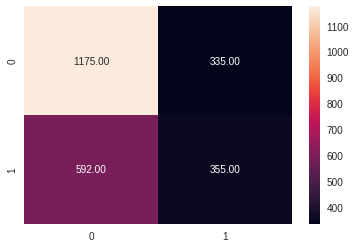

In [137]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=300)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')


scores = cross_validate(model, X_train, y_train, return_train_score=True, n_jobs=-1)
evaluation = [( X_train, y_train), ( X_test, y_test)]


print("Train Score : ", np.mean(scores['train_score']))
print("Test Score : ", np.mean(scores['test_score']))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1510
           1       0.57      0.43      0.49       947

    accuracy                           0.66      2457
   macro avg       0.63      0.61      0.62      2457
weighted avg       0.65      0.66      0.64      2457

Train Score :  1.0
Test Score :  0.7142076911566662


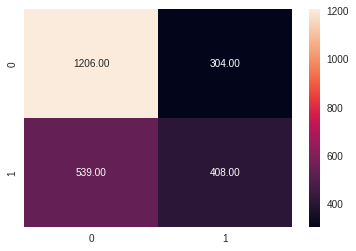

In [136]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
model = BaggingClassifier(n_estimators=80)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

scores = cross_validate(model, X_train, y_train, return_train_score=True, n_jobs=-1)
evaluation = [( X_train, y_train), ( X_test, y_test)]


print("Train Score : ", np.mean(scores['train_score']))
print("Test Score : ", np.mean(scores['test_score']))

In [40]:
model.predict_proba(X_test)


array([[0.65  , 0.35  ],
       [0.8625, 0.1375],
       [0.775 , 0.225 ],
       ...,
       [0.025 , 0.975 ],
       [0.725 , 0.275 ],
       [0.575 , 0.425 ]])

In [77]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [67]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

62.64

In [68]:
#Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

73.5

In [69]:
#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

78.14

In [70]:
#GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

61.54

In [71]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [72]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [120]:

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Accurcy': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree,]})
models.sort_values(by='Accurcy', ascending=False)

,Model,Accurcy
3,Random Forest,100.00
5,Decision Tree,100.00
1,KNN,78.14
0,Support Vector Machines,73.50
2,Logistic Regression,62.64
4,Naive Bayes,61.54
